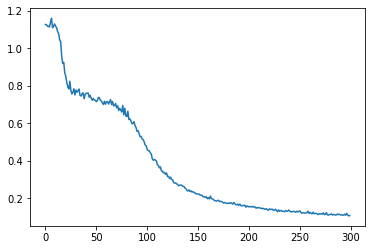

In [1]:
# coding: utf-8

import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from my_two_layer_net import TwoLayerNet

# ハイパラ
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# load, make model & optimizer 
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# variable for train
data_size = len(x)
max_iters = data_size // batch_size # 切捨て除算。ミニバッチ内のキリが良いデータ数
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # shuffle data
    idx = np.random.permutation(data_size) # ランダムに並び替える
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size] # ミニバッチを取り出す
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # grad & update params
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習結果を出力
        if (iters+1) % 10 == 0: # ミニバッチの区切りが10の倍数になったら
            avg_loss = total_loss / loss_count
            # print('| epoch %d | iter %d / %d | loss %.2f' % (epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

plt.plot(loss_list)
plt.show()